ADTK (Anomaly Detection Toolkit) is important tool to perform anomaly detection , without creating a model (time consuming and cache saving process)

<function matplotlib.pyplot.show(close=None, block=None)>

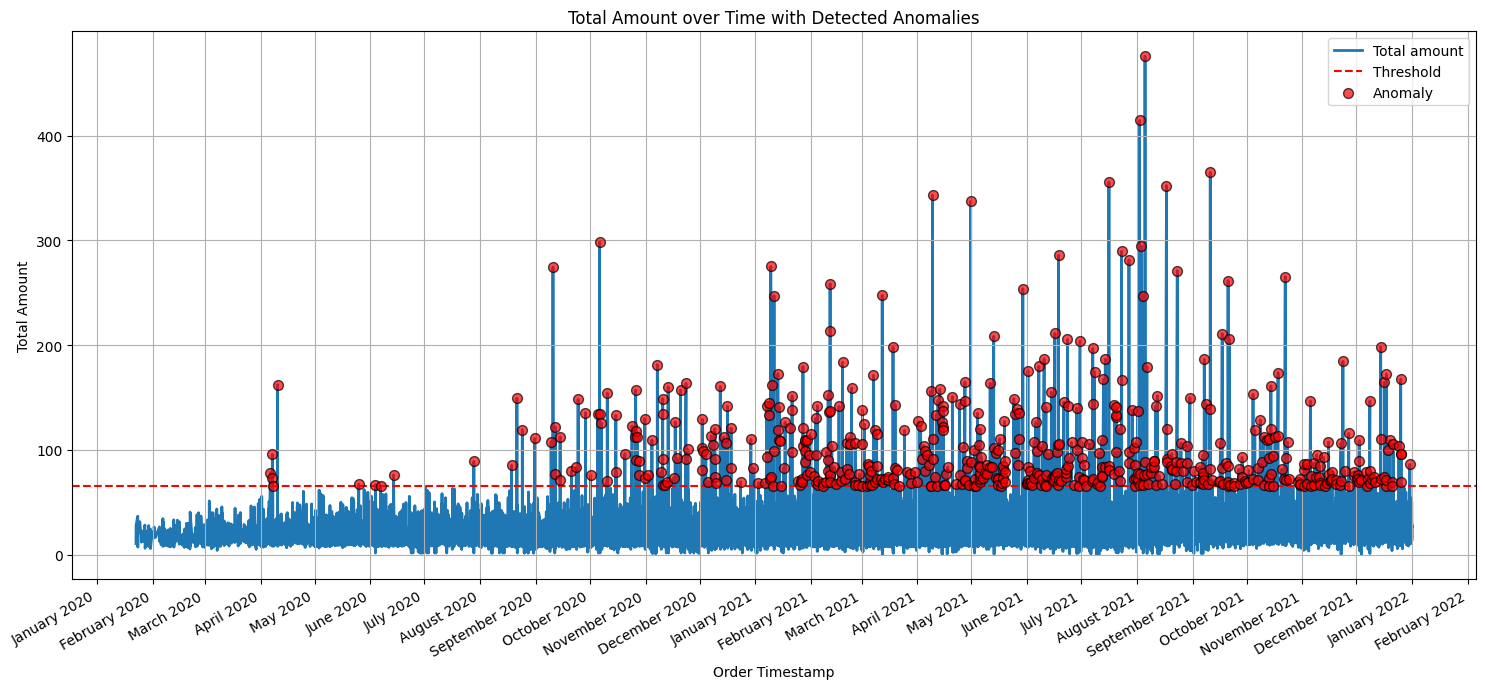

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming we have read the dataset into a DataFrame 'df'
df = pd.read_csv(r"C:\Users\Admin\Documents\Data Intelligence Engineer project\Task Files\cleaned-dataset.csv")

# Convert the 'Order Timestamp' column to datetime if it's not already
df['Order Timestamp'] = pd.to_datetime(df['Order Timestamp'])

# Sort the DataFrame based on 'Order Timestamp' to ensure it's in chronological order
df.sort_values('Order Timestamp', inplace=True)

# Set 'Order Timestamp' as the index
df.set_index('Order Timestamp', inplace=True)

# Define a threshold for anomaly detection
threshold_value = 65

# Create a new column to identify anomalies
df['Anomaly'] = df['Total amount'] > threshold_value

plt.figure(figsize=(15, 7))

# Plot 'Total amount'
plt.plot(df.index, df['Total amount'], label='Total amount', linewidth=2, zorder=1)  # Set zorder to bring it to the front

# Draw a horizontal line for the threshold
plt.axhline(y=threshold_value, color='r', linestyle='--', label='Threshold', zorder=2)  # Set zorder to bring it to the front

# Highlight anomalies with larger, less transparent red dots
plt.scatter(df.index[df['Anomaly']], df['Total amount'][df['Anomaly']], 
            color='red', label='Anomaly', s=50, alpha=0.7, edgecolor='black', zorder=3)  # Set zorder to bring it to the front

# Formatting the plot
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.gcf().autofmt_xdate()
plt.xlabel('Order Timestamp')
plt.ylabel('Total Amount')
plt.title('Total Amount over Time with Detected Anomalies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show